## 01. PyTorch Workflow Fundamentals
The essence of machine learning and deep learning is to take some data from the past, build an algorithm (like a neural network) to discover patterns in it and use the discovered patterns to predict the future

Steps:
1. Getting the data ready
2. Building a model
3. Fitting the model to data (training)
4. Making predictions and evaluating a model (inferencing)
5. Saving and loading the model
6. Putting it all together

#### 1. Data (Preparing and Loading)

In [78]:
import torch
from torch import nn 
# nn contains all of PyTorch's building blocks for neural networks

import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cpu'

In [79]:
'''
For the purpose of this example, we'll create a simple dataset with our made up data.

We'll use linear regression to create the data with known parameters 
(things that can be learned by a model) and then we'll use PyTorch to see if we 
can build model to estimate these parameters using gradient descent.

'''

# Create known parameters
weight = 0.7
bias = 0.3

# Create a dataset
start = 0
end = 1
step = 0.02
x = torch.arange(start, end, step).unsqueeze(dim=1)
# unsqueeze adds a dimension to the tensor by changing the shape from (50,) to (50, 1)
# We add this dimension because y = (weight * x) + bias is expecting a 2D tensor
y = (weight * x) + bias

# Below code will show the first 10 samples of the dataset for both x and y
# English translation is: For the first 10 rows, show me all the columns
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [80]:
'''
Split data into training and test sets
--> We'll use 80% of the data for training and 20% for testing
'''
# Create train/test split
train_split = int(0.8 * len(x)) # 80% of data used for training set, 20% for testing 
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]


''' Below will be our function for plotting the data '''

def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, label="Predictions", color="red")
    plt.legend()
    plt.show()

len(x_train), len(y_train), len(x_test), len(y_test)


(40, 40, 10, 10)

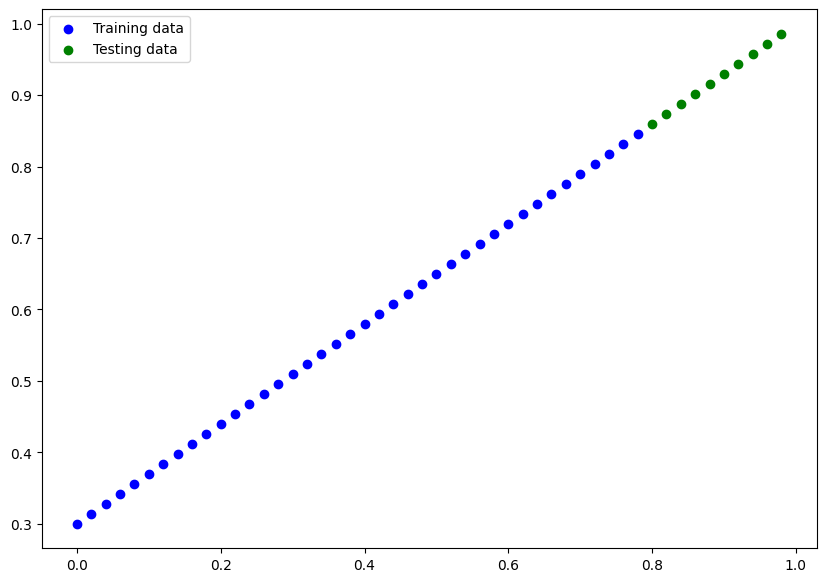

'\nWe were able to plot our data through a scatter plot\nNow we need to make our model\n'

In [81]:
plot_predictions()
'''
We were able to plot our data through a scatter plot
Now we need to make our model
'''

#### 2. Build Model

In [82]:
'''
Building our first model through Linear Regression. We will represent our model using y = mx + b.
'''
class LinearRegression(nn.Module): # Inherits from nn.Module (Neural Network Module)
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,                   # Start with random values and try to adjust it to the ideal weight
                                                requires_grad=True, # If the Parameter requires Gradient
                                                dtype=torch.float)) # float is the default data type
                                                
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True, 
                                             dtype=torch.float))
    '''
        What does our Model do:
        
            1. Start with random values for weight & bias
            2. Look at training data and adjust the random values to better represent (or get closer to)
            the ideal values (the weight & bias values we used to create the data)
        
        How does it do so?
        
            -> 2 Algorithms
                1. Gradient Descent (why we set requires_grad=True)
                2. Backpropagation
                
        Any subclass of the nn module must override the forward method 
            - defines the forward computation of the model           
    '''
    def forward(self, x: torch.Tensor) -> torch.Tensor: # Returns a Tensor datatype
        return self.weight * x + self.bias 
        # This is our Linear Regression Formula
        

#### 2.1 PyTorch Model Building Essentials
* `torch.nn` contains all of the buildings for computational graphs (neural networks)
* `torch.nn.Parameter` contains what parameters our model must try and learn, often a PyTorch layer from `torch.nn` will set these for us
* `torch.nn.Module` The base class for all Neural Network Modules, if you make a subclass, override forward
* `torch.optim` This is where the optimizers in PyTorch are, will help with Gradient Descent
* `def forward()` This method defines what is performed in the forward computation

#### 2.2 PyTorch Workflow Essentials
1. Get Data Ready
    * `torchvision.transforms`
    * `torch.utils.data.Dataset`
    * `torch.utils.data.DataLoader`
2. Build or Pick a Model
    * `torch.nn`
    * `torch.nn.Module`
    * `torchvision.models`
    * `torch.optim`
3. Evaluate the Model
    * `torchmetrics`
4. Improve through Experimentation
    * `torch.utils.tensorboard`

In [83]:
'''
Now that we have our model, lets look inside of the model.
We can do this by using .parameters() method
'''

# Create a random seed for reproducibility
torch.manual_seed(42)

# Create an instance of the model we just created
model_0 = LinearRegression()

# Check out the parameters of the model
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [84]:
# List the named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [85]:
''' 
Our parameters for weight and bias inside the model are obviously not the same as the ones we used to create the data.
We will be making predictions using torch.inference_mode() to see how well it predicts 'y_test' based on 'x_test'.

When we pass data through our model, it will run it through our forward method.
'''

with torch.inference_mode():
    ''' 
    Inference Mode turns off the gradient calculations 
        - The benefit of this is PyTorch will not be keeping track of excess information
          providing faster calculations
    '''
    y_preds = model_0(x_train)

# Another way of calculating the predictions using gradient calculations
# y_preds = model_0(x_test)

'''
Remember, the goal of making a model is to train it, an ideal model is to have our 'y_preds' as close to 'y_test' as possible.
'''

# Plot the predictions


print("y-test results: ",y_test[:10])
print("\ny-prediction results ", y_preds[:10])

y-test results:  tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

y-prediction results  tensor([[0.1288],
        [0.1355],
        [0.1423],
        [0.1490],
        [0.1557],
        [0.1625],
        [0.1692],
        [0.1759],
        [0.1827],
        [0.1894]])


#### 3. Training the Model
The idea is to traing our model to move from unknown random paramters to known parameters

In [86]:
'''
- Things we need to train:
    1. Loss Function : measures how WRONG our model's predictions are to the actual values.
    2. Optimizer : takes into account the loss of the model and ADJUSTS the model's parameters (weight & bias) to improve the loss function.
    -- Specifically for PyTorch, we need:
        - A training loop
        - A testing loop
        
- Thankfully, PyTorch has many built-in loss/cost and optimizer functions.

- Usually loss functions calculate the Mean Absolute Error (MAE) of all y_preds with y_test
    -> Equation: MAE = | y_pred[i] - y_test[i] | 
    -> Smaller the value the better the model
    -> We are able to write this out in PyTorch using torch.nn.L1Loss()
       -> or MAE_loss = torch.mean(torch.abs(y_preds - y_test))
'''

# Setup a Loss Function
loss_fn = nn.L1Loss()

# Setup an Optimizer
# SGD = Stochastic Gradient Descent
optimizer = torch.optim.SGD(params=model_0.parameters(),  # Parameters of the model
                            lr=0.01)                      # lr = learning rate = important hyperparameter you can set
'''
- Revisit that the randomly generated parameters from the model are:
    weight = 0.3367
    bias = 0.1288
- The learning rate is how much the model will adjust the parameters by
- In this case, our learning rate is set to 0.01 so the values will change by 0.01
'''

'\n- Revisit that the randomly generated parameters from the model are:\n    weight = 0.3367\n    bias = 0.1288\n- The learning rate is how much the model will adjust the parameters by\n- In this case, our learning rate is set to 0.01 so the values will change by 0.01\n'

#### 3.1 Building a Training and Testing Loop
What we need in a training loop:
1. Loop through the data
2. Forward Pass (this involves data moving through our model's `forward()`) to make predictions
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimize zero gradient
5. Loss backward - moves backward through the network to calculate the gradients of each of the parameters of the model with respect to the loss (**backpropagation**)
6. Optimizer Step - use optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [ ]:
# An epoch is one loop through the data...
epochs = 1000
''' --------------------------------- Training Loop --------------------------------- '''
# 1. Loop through the data
for epoch in range(epochs):
    
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters the use gradients to True
    
    # 2. Forward pass
    y_pred = model_0(x_train)
    
    # 3. Calculate loss
    loss = loss_fn(y_pred, y_train)
    # print(f"Loss: {loss.item()}")
    
    # 4. Optimizer zero gradients
    optimizer.zero_grad()
    
    # 5. Backward pass (Backpropagation)
    loss.backward()
    
    # 6. Optimizer step (Gradient Descent)
    optimizer.step() # by default, the optimizer changes will 
                     # accumulate through the loop, so we have 
                     # to zero them above in step 4 for the next iteration
                     
    ''' -------------------------------- Testing Loop -------------------------------- '''        
    model_0.eval() # turns off gradient calculations
    
    with torch.inference_mode():
    # with torch.no_grad(): # equivalent to torch.inference_mode()
        # 1. Forward pass        
        test_preds = model_0(x_test)

        # 2. Calculate loss
        test_loss = loss_fn(test_preds, y_test)
    if epoch % 100 == 0:
        print( f"Epoch {epoch} | Loss: {loss} | Testing Loss: {test_loss}")
    
# print("Weight: ", weight, " | Bias: ", bias)
# print(model_0.state_dict())

Epoch 0 | Loss: 0.31288138031959534 | Testing Loss: 0.48106518387794495
Epoch 200 | Loss: 0.008932482451200485 | Testing Loss: 0.005023092031478882
Epoch 400 | Loss: 0.008932482451200485 | Testing Loss: 0.005023092031478882
Epoch 600 | Loss: 0.008932482451200485 | Testing Loss: 0.005023092031478882
Epoch 800 | Loss: 0.008932482451200485 | Testing Loss: 0.005023092031478882


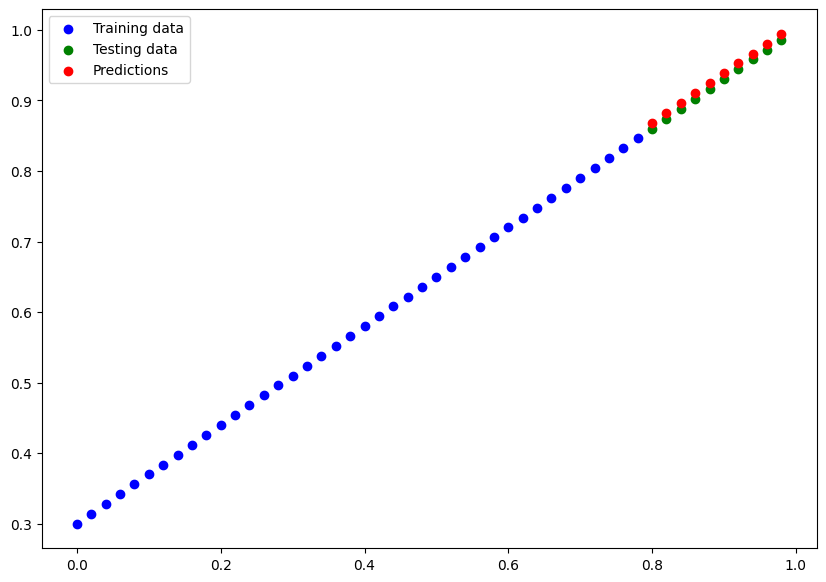

In [92]:
plot_predictions(predictions=test_preds)